<a href="https://colab.research.google.com/github/audrey-siqueira/Data-Science-Projects/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction Using Simple Linear Regression**
---
<p align="justify">
 A company is looking for workers for a new project, aiming the growth in the market in order to obtain the best professionals at the lowest possible cost. This responsibility was delegated to the company's HR department.

<p align=center>
<img src="https://drive.google.com/uc?id=1hsmkKsBEQ-1MBRwMEJb7nqHkXY9Hzwnj" width="80%"></p>

<p align="justify">
The HR department decided to use the salary history of its former workers along with their respective years of experience, to propose new salaries in the future, consistent with the years of experience of the new workers, in a way that the company does not offer a very high salary for a worker with few years of experience, nor does it offer a salary so low that a great talent can accept another competing company proposal.


The proposed model was a a **Simple Linear Regression** using the company's database, with the values of **Years of Experience** of former workers on the X axis and the respective **Salaries** of former workers on the Y axis.

<p align=center>
<img src="https://drive.google.com/uc?id=1N-UE1KHgnLl43LFvo9dS5fCzGTWkL1F6" width="60%"></p>

<p align="justify">
The database was divided into 2 parts, the Training part used the parameters values to generate the salary prediction curve, the Testing part was used to compare the real values with the prediction curve generated in the training and check the accuracy percentage of generated model.




**Code description is explained below:**

## **Importing the libraries**


The 3 libraries needed for the project are imported.
- Pandas for data manipulation and analysis
- Numpy for mathematical operations
- Matplotlib for graphical visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the data set**


The .csv file containing the company's database is imported.

Separating **Years of Experience** as the corresponding X-axis values and the **Salary** as Y-axis values, it was obtained final data set..

The values of the database header and how they are distributed can be viewed in the image below:

In [ ]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/1-Simple Linear Regression/Salary_Data.csv')
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## **Splitting the dataset into the Training set and Test set**

The ***sklearn.model_selection*** library was used to divide the database between Training set and Test set. 

X and Y axes values were divided between Training set and Test set, resulting in 4 final vectors:
**X_train**, **X_test** and **Y_train**, **Y_test**

Due to the small size of the database, it was agreed to be better to use 2/3 of the total values for Training and 1/3 of the total values for Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

## **Fitting Simple Linear Regression to the Training Set**

The **sklearn.linear_model** library was used to apply the **Simple Linear Regression** method.

Using the **Training set** of X and Y values, a prediction curve is created.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Visualising the Training Set Results**

A graph was plotted with the real values of **X-axis values VERSUS Y-axis values** (red dots), present in the **Training set**. From these previously mentioned values, the model generated a prediction curve (blue line).

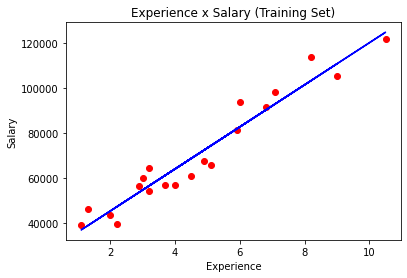

In [ ]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Experience x Salary (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## **Predicting the Test Set Results**

In this step was created a vector of predictions using the values of X-axis from **Test set**, based on the regressor generated with the **Training set** in previous step.

Comparing these predictions with the real values of Y-axis in the **Test set**, is possible to calculate the accuracy of the model.

In [ ]:
Y_pred= regressor.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 40835.11  37731.  ]
 [123079.4  122391.  ]
 [ 65134.56  57081.  ]
 [ 63265.37  63218.  ]
 [115602.65 116969.  ]
 [108125.89 109431.  ]
 [116537.24 112635.  ]
 [ 64199.96  55794.  ]
 [ 76349.69  83088.  ]
 [100649.14 101302.  ]]


## **Evaluating the Model Performance**

The **sklearn.metrics** library was used to apply the **R square** method and verify the accuracy of this model.

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9749154407708353

## **Conclusion**

Simple Linear Regression proved to be a great model forecasting results for Salaries according to Years of Experience, outcoming an accuracy of 97,5%.